<a href="https://colab.research.google.com/github/dribnet/clipit/blob/master/demos/Start_Here.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pixray Start Here Demo

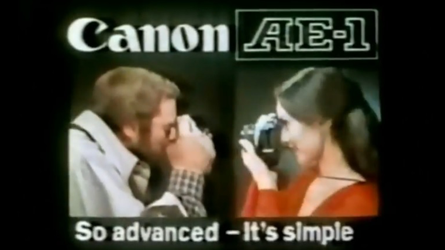

In [1]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. You should only need to run this part once.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

%%capture
!git clone https://github.com/openai/CLIP
# !pip install taming-transformers
!git clone https://github.com/CompVis/taming-transformers.git
!rm -Rf pixray
!git clone https://github.com/dribnet/pixray
!pip install ftfy regex tqdm omegaconf pytorch-lightning
!pip install kornia
!pip install imageio-ffmpeg   
!pip install einops
!pip install torch-optimizer
!pip install easydict
!pip install braceexpand
!pip install git+https://github.com/pvigier/perlin-numpy
!mkdir -p steps
!mkdir -p models

import sys
sys.path.append("pixray")

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.
Restored from models/vqgan_imagenet_f16_16384.ckpt
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['sunset in the city']
Using seed: 3956331731335892082 65129586


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


iter: 0, loss: 1.92, losses: 0.97, 0.952 (-0=>1.922)


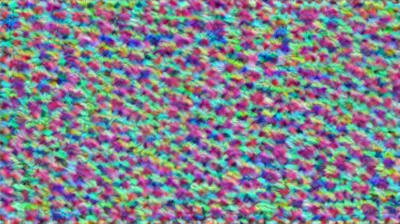

iter: 10, loss: 1.76, losses: 0.885, 0.877 (-0=>1.763)
iter: 20, loss: 1.67, losses: 0.827, 0.839 (-1=>1.659)


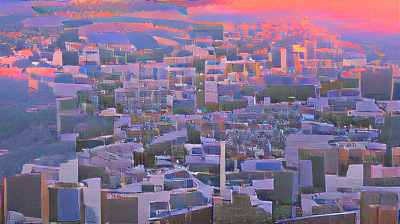

iter: 30, loss: 1.62, losses: 0.808, 0.815 (-2=>1.604)
iter: 40, loss: 1.59, losses: 0.791, 0.797 (-0=>1.588)


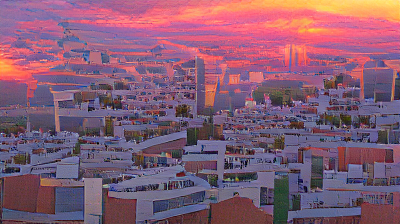

iter: 50, loss: 1.6, losses: 0.796, 0.803 (-4=>1.577)
iter: 60, loss: 1.56, losses: 0.778, 0.784 (-0=>1.562)


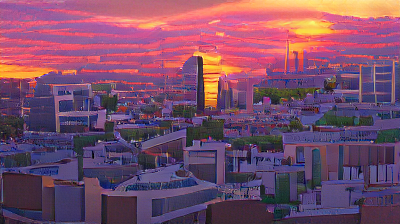

iter: 70, loss: 1.57, losses: 0.782, 0.789 (-2=>1.537)
iter: 80, loss: 1.57, losses: 0.78, 0.793 (-12=>1.537)


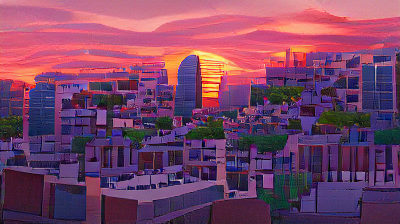

iter: 90, loss: 1.53, losses: 0.759, 0.768 (-1=>1.523)
iter: 100, loss: 1.57, losses: 0.778, 0.788 (-6=>1.519)


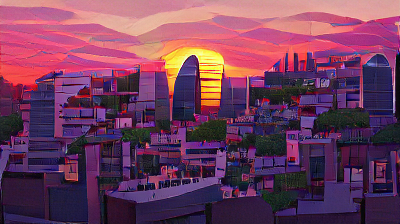

iter: 110, loss: 1.52, losses: 0.755, 0.764 (-8=>1.517)
iter: 120, loss: 1.5, losses: 0.749, 0.755 (-0=>1.503)


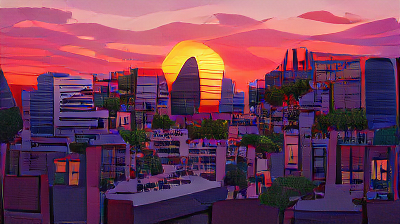

iter: 130, loss: 1.53, losses: 0.762, 0.772 (-10=>1.503)
iter: 140, loss: 1.53, losses: 0.762, 0.769 (-20=>1.503)


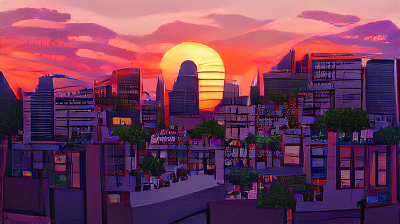

iter: 150, loss: 1.5, losses: 0.748, 0.752 (-5=>1.494)
iter: 160, loss: 1.51, losses: 0.751, 0.756 (-15=>1.494)


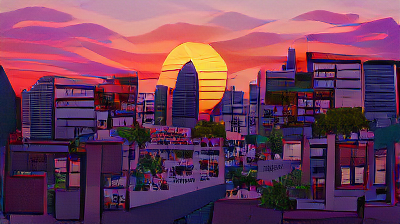

iter: 170, loss: 1.54, losses: 0.768, 0.774 (-6=>1.493)
iter: 180, loss: 1.5, losses: 0.746, 0.751 (-16=>1.493)


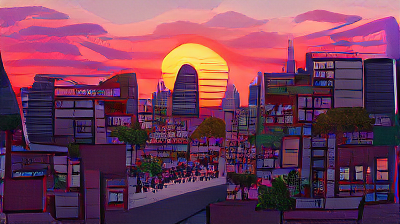

iter: 190, loss: 1.55, losses: 0.771, 0.777 (-3=>1.488)
iter: 200, loss: 1.54, losses: 0.766, 0.775 (-13=>1.488)


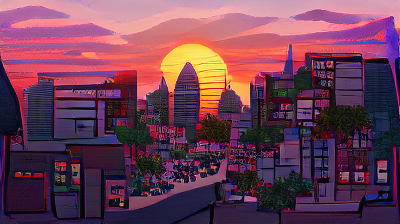

iter: 210, loss: 1.54, losses: 0.768, 0.774 (-23=>1.488)
iter: 220, loss: 1.5, losses: 0.748, 0.751 (-33=>1.488)


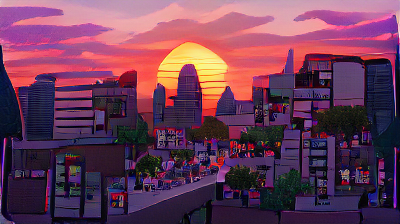

iter: 230, loss: 1.49, losses: 0.742, 0.751 (-43=>1.488)
iter: 240, loss: 1.55, losses: 0.769, 0.777 (-53=>1.488)


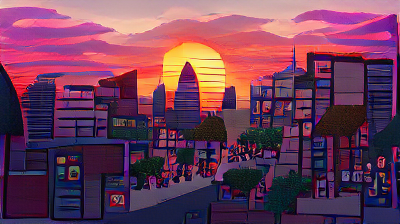

iter: 250, loss: 1.49, losses: 0.744, 0.75 (-63=>1.488)
iter: 260, loss: 1.53, losses: 0.761, 0.767 (-6=>1.485)


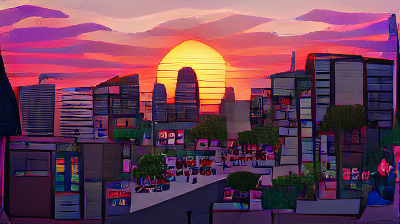

iter: 270, loss: 1.53, losses: 0.764, 0.766 (-16=>1.485)
Dropping learning rate
iter: 279, loss: 1.5, losses: 0.747, 0.75 (-25=>1.485)
iter: 280, loss: 1.54, losses: 0.765, 0.772 (-1=>1.485)


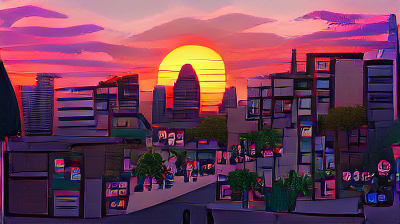

iter: 290, loss: 1.48, losses: 0.742, 0.742 (-0=>1.483)
iter: 300, loss: 1.53, losses: 0.758, 0.77 (-7=>1.481)


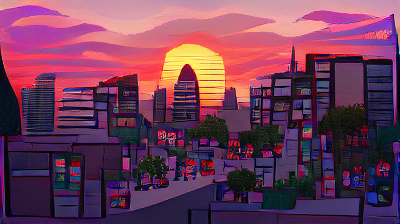

iter: 310, loss: 1.51, losses: 0.753, 0.756 (-17=>1.481)
Dropping learning rate
iter: 314, loss: 1.5, losses: 0.748, 0.753 (-21=>1.481)
iter: 320, loss: 1.51, losses: 0.748, 0.757 (-6=>1.481)


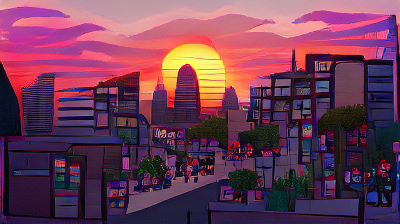

iter: 330, loss: 1.53, losses: 0.761, 0.768 (-2=>1.478)
iter: 340, loss: 1.48, losses: 0.739, 0.745 (-1=>1.475)


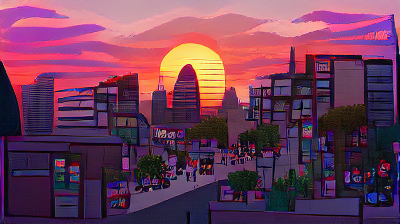

iter: 350, loss: 1.53, losses: 0.764, 0.769 (-11=>1.475)
iter: 350, loss: 1.53, losses: 0.764, 0.769 (-11=>1.475)


In [2]:
#@title Settings for your run

#@markdown This text prompt is what the computer will try to draw.

#@title Parameters
prompts = "sunset in the city" #@param {type:"string"}

#@markdown you can trade off speed for quality

quality = "normal" #@param ["draft", "normal", "better", "best"]

#@markdown some people actually like square?  ¯\\_(ツ)_/¯

aspect = "widescreen" #@param ["widescreen", "square"]

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will start drawing and show you results as it goes along.

#@markdown _(I can get "better" running on the colabs, but not "best".
#@markdown Sometimes it is necessary to "Restart Runtime" to clear memory.)_

# Simple setup from menu choices
import pixray
pixray.reset_settings()
pixray.add_settings(prompts=prompts, aspect=aspect, quality=quality)

# Optional: you could put extra settings here...

# Apply these settings and run
settings = pixray.apply_settings()
pixray.do_init(settings)
pixray.do_run(settings)
